In [18]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'C:/Users/anike/Desktop/ALL INTERNSHIP/AICTE Winter Internship December/Dataset/Dataset/train',
    labels = "inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
    

Found 70295 files belonging to 38 classes.


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
Validation_set=tf.keras.utils.image_dataset_from_directory(
    'C:/Users/anike/Desktop/ALL INTERNSHIP/AICTE Winter Internship December/Dataset/Dataset/valid',
    labels = "inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
    

Found 17572 files belonging to 38 classes.


In [20]:
from tensorflow.keras import layers, models

# Define Sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Input layer for RGB images
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # First pooling layer

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Second convolutional layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))          # Second pooling layer

model.add(layers.Conv2D(128, (3, 3), activation='relu'))   # Third convolutional layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))           # Third pooling layer

model.add(layers.Conv2D(256, (3, 3), activation='relu'))   # fourth convolutional layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))           # Third pooling layer

model.add(layers.Conv2D(512, (3, 3), activation='relu'))   # Third convolutional layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))           # Third pooling layer

# Add Dropout Layer to prevent overfitting
model.add(layers.Dropout(0.30)) 

model.add(layers.Flatten())                                  # Flattening the output from convolutional layers
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))             # Dense layer for classification


# Add Dropout Layer to prevent overfitting
model.add(layers.Dropout(0.4)) 

model.add(tf.keras.layers.Dense(units=38,activation='softmax'))  


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to verify architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [21]:
# Train the model
history = model.fit(
training_set,
validation_data=Validation_set,
epochs=2 # You can adjust this number based on your needs 
)

Epoch 1/2
2197/2197 [==============================] - 972s 442ms/step - loss: 1.3536 - accuracy: 0.6122 - val_loss: 0.5789 - val_accuracy: 0.8159
Epoch 2/2
2197/2197 [==============================] - 1027s 468ms/step - loss: 0.5940 - accuracy: 0.8166 - val_loss: 0.5323 - val_accuracy: 0.8384


In [22]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(Validation_set)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


550/550 [==============================] - 47s 85ms/step - loss: 0.5323 - accuracy: 0.8384
Validation Loss: 0.5323
Validation Accuracy: 0.8384


In [ ]:
# Evaluate the model on the training accuracy
train_loss, train_accuracy = model.evaluate(training_set)  # Replace 'test_set' with your actual test dataset variable
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')


2197/2197 [==============================] - 259s 118ms/step - loss: 0.4551 - accuracy: 0.8584
Training Loss: 0.4551
Training Accuracy: 0.8584


In [24]:
model.save('Plant_diesease_training_model.keras')

In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


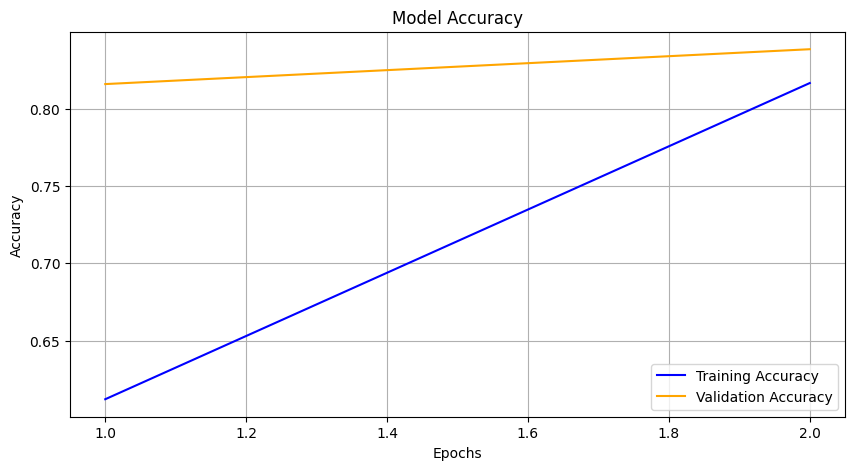

In [36]:
import matplotlib.pyplot as plt

# Adjust the epochs list to match the number of training epochs
epochs = [i for i in range(1, len(history.history['accuracy']) + 1)]  # Automatically matches history length

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='orange', label='Validation Accuracy')

# Add titles and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
class_name = Validation_set.class_names

In [38]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'C:/Users/anike/Desktop/ALL INTERNSHIP/AICTE Winter Internship December/Dataset/Dataset/valid',
    labels = "inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred =model.predict(test_set)
predicted_category = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 123s 7ms/step


In [43]:
# Assuming test_set is an iterable that yields (image, label) pairs
true_categories = tf.concat([y for x, y in test_set], axis=0)  # Combine all labels from test_set
y_true = tf.argmax(true_categories, axis=1)  # Get the class indices from one-hot encoded labels


In [44]:
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
predicted_category

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, predicted_category)


In [53]:
from sklearn.metrics import classification_report

# Assuming y_true and predicted_category are already defined
# y_true: True class indices
# predicted_category: Predicted class indices
# class_names: List of class names corresponding to the indices

# Example: Define class names (replace with your actual class names)
class_names = test_set.class_names  # Assuming your test_set has class names

# Print classification report
print(classification_report(y_true.numpy(), predicted_category.numpy(), target_names=class_names))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.79      0.89      0.84       504
                                 Apple___Black_rot       0.97      0.90      0.93       497
                          Apple___Cedar_apple_rust       0.91      0.87      0.89       440
                                   Apple___healthy       0.88      0.78      0.83       502
                               Blueberry___healthy       0.82      0.97      0.89       454
          Cherry_(including_sour)___Powdery_mildew       0.87      0.97      0.92       421
                 Cherry_(including_sour)___healthy       0.98      0.87      0.92       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.90      0.87       410
                       Corn_(maize)___Common_rust_       0.96      0.99      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.90      0.

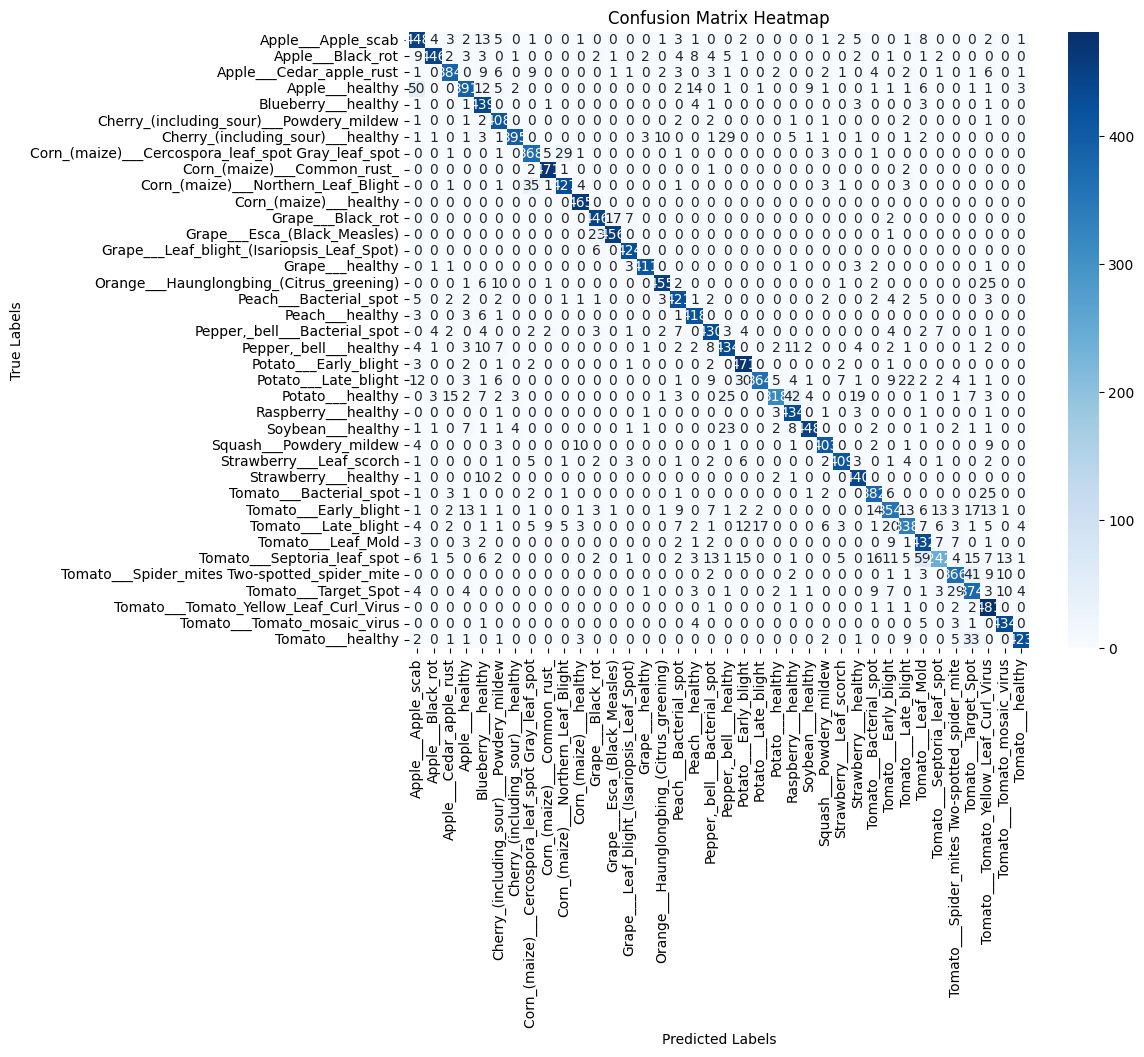

In [54]:

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()